# M1 MIASHS - Outils professionnels
## Initiation Scrapping + analyse sémantique
<img src="Images/Python.gif" alt="drawing" width="200"/>

# Sommaire
- [1. Scrapping URL](#sect1)
- [2. Nettoyage du texte](#sect2)
- [3. Wordcloud](#sect3)


In [3]:
import requests
import urllib.request
from bs4 import BeautifulSoup
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
import string
from nltk.probability import FreqDist
from nltk.stem.snowball import FrenchStemmer
import nltk

## 1. <a name="sect1"></a>Scrapping URL
Une façon simple de récupérer le contenu d'une page est de récupérer l'ensemble du code source.
Pour cela, on utilise le package request et sa fonction get. Celle-ci prend en paramètre une url et renvoie un objet de type Response qui renvoie 'Response [200]' si l'extraction a bien fonctionné.

In [4]:
url = 'https://www.lebigdata.fr/tout-savoir-dataiku'

In [5]:
# Créer une variable response qui contient le contenu de l'url en utilisant la fonction get du package requests
response = requests.get(url)

In [6]:
#Afficher la variable response pour vérifier que l'extraction a bien marché
response

<Response [200]>

In [18]:
# Afficher le contenu de la variable response en utilisant l'attribut text
response.text

'<!doctype html><html lang=fr prefix="og: http://ogp.me/ns#"><head><meta charset=utf-8><script data-ezscrex=false data-cfasync=false data-pagespeed-no-defer>var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=false;__ez.queue=(function(){var count=0,incr=0,items=[],timeDelayFired=false,hpItems=[],lpItems=[],allowLoad=true;var obj={func:function(name,funcName,parameters,isBlock,blockedBy,deleteWhenComplete,proceedIfError){var self=this;this.name=name;this.funcName=funcName;this.parameters=parameters===null?null:(parameters instanceof Array)?parameters:[parameters];this.isBlock=isBlock;this.blockedBy=blockedBy;this.deleteWhenComplete=deleteWhenComplete;this.isError=false;this.isComplete=false;this.isInitialized=false;this.proceedIfError=proceedIfError;this.isTimeDelay=false;this.process=function(){log("... func = "+name);self.isInitialized=true;self.isComplete=true;log("... func.apply: "+name);var funcs=self.funcName

Sur la base de ce code source, il va ensuite falloir extraire les parties qui nous intéresse. Pour cela, il va falloir avoir un interpréteur HTML. C'est l'intêret du package BeautifulSoup.

In [10]:
# Créer un objet BeautifulSoup qui prend en paramètre le contenu de la variable response et "html.parser"
# L'affecter à la variable soup
soup = BeautifulSoup(response.text, "html.parser")

Il est ensuite nécessaire de regarder le code source pour identifier les balises qui contiennent le texte que l'on souhaite conserver. Dans notre cas, on remarque que la balise < p style="text-align: justify;"> précéde chaque paragraphe. On va donc utiliser la méthode findAll en lui passant en paramètre cette information pour extraire uniquement ces parties du code source

In [11]:
# Utiliser la méthode findAll sur la variable soup 
# pour extraire le texte contenu dans les balises <p style = "text-align:justify;"
p_box = soup.findAll('p',{"style":"text-align: justify;"})

On obtiens alors une liste où chaque élément correspond à une balise trouvée. Le type de chaque élément est un objet Tag. Ce type d'objet possède un attribut text qui permet de récupérer le texte sans les balises html.

In [12]:
# Afficher le 1er élément de p_box en format string sans balises
p_box[0].text

"La plateforme de Data science Dataiku DSS propose aux équipes de professionnels des données de collaborer au sein d’un même environnement. Elle permet non seulement le traitement analytique des données, mais également le développement de nouvelles solutions. Découvrez tout ce que vous devez savoir sur Dataiku DSS.eval(ez_write_tag([[336,280],'lebigdata_fr-medrectangle-3','ezslot_1',106,'0','0']));Dataiku DSS est une plateforme de développement intégrée, destinée aux professionnels des données. Elle permet de convertir efficacement les données en prédictions. Cette plateforme logicielle se distingue par son approche collaborative. Les équipes de spécialistes au sein d’une entreprise peuvent l’utiliser pour explorer, développer et produire leurs propres produits data plus efficacement. La plateforme\xa0permet de préparer, mélanger et modéliser, d’automatiser le workflow, et de déployer la production.Il s’agit d’un outil tout-en-un permettant de développer un projet de bout en bout, de l

In [13]:
# Créer une nouvelle liste texte en appliquant la modification précédente à tous les éléments de p_box
texte = [element.text for element in p_box]

In [14]:
# Concaténer l'ensemble de la liste en une seule chaine de caractère
texte = ' '.join(texte)

In [15]:
texte

"La plateforme de Data science Dataiku DSS propose aux équipes de professionnels des données de collaborer au sein d’un même environnement. Elle permet non seulement le traitement analytique des données, mais également le développement de nouvelles solutions. Découvrez tout ce que vous devez savoir sur Dataiku DSS.eval(ez_write_tag([[336,280],'lebigdata_fr-medrectangle-3','ezslot_1',106,'0','0']));Dataiku DSS est une plateforme de développement intégrée, destinée aux professionnels des données. Elle permet de convertir efficacement les données en prédictions. Cette plateforme logicielle se distingue par son approche collaborative. Les équipes de spécialistes au sein d’une entreprise peuvent l’utiliser pour explorer, développer et produire leurs propres produits data plus efficacement. La plateforme\xa0permet de préparer, mélanger et modéliser, d’automatiser le workflow, et de déployer la production.Il s’agit d’un outil tout-en-un permettant de développer un projet de bout en bout, de l

## <a name="sect2"></a>2. Analyse du texte

In [16]:
# Tokeniser le texte en utilisant la fonction word_tokenize du package nltk
tokens = nltk.word_tokenize(texte)

In [17]:
tokens

['La',
 'plateforme',
 'de',
 'Data',
 'science',
 'Dataiku',
 'DSS',
 'propose',
 'aux',
 'équipes',
 'de',
 'professionnels',
 'des',
 'données',
 'de',
 'collaborer',
 'au',
 'sein',
 'd',
 '’',
 'un',
 'même',
 'environnement',
 '.',
 'Elle',
 'permet',
 'non',
 'seulement',
 'le',
 'traitement',
 'analytique',
 'des',
 'données',
 ',',
 'mais',
 'également',
 'le',
 'développement',
 'de',
 'nouvelles',
 'solutions',
 '.',
 'Découvrez',
 'tout',
 'ce',
 'que',
 'vous',
 'devez',
 'savoir',
 'sur',
 'Dataiku',
 'DSS.eval',
 '(',
 'ez_write_tag',
 '(',
 '[',
 '[',
 '336,280',
 ']',
 ',',
 "'lebigdata_fr-medrectangle-3",
 "'",
 ',',
 "'ezslot_1',106",
 ',',
 "'",
 '0',
 "'",
 ',',
 "'",
 '0',
 "'",
 ']',
 ')',
 ')',
 ';',
 'Dataiku',
 'DSS',
 'est',
 'une',
 'plateforme',
 'de',
 'développement',
 'intégrée',
 ',',
 'destinée',
 'aux',
 'professionnels',
 'des',
 'données',
 '.',
 'Elle',
 'permet',
 'de',
 'convertir',
 'efficacement',
 'les',
 'données',
 'en',
 'prédictions',
 '.'

In [20]:
# Calculer la fréquence de chaque mot en utilisant la fonction FreqDist du package nltk.probability
fdist = FreqDist(tokens)
fdist

FreqDist({'de': 145, ',': 135, '.': 129, '’': 110, 'les': 76, 'et': 75, 'des': 56, 'd': 48, 'données': 43, 'à': 41, ...})

In [21]:
# Afficher les 10 mots les plus communs en utilisant la méthode most_common
fdist.most_common(10)

[('de', 145),
 (',', 135),
 ('.', 129),
 ('’', 110),
 ('les', 76),
 ('et', 75),
 ('des', 56),
 ('d', 48),
 ('données', 43),
 ('à', 41)]

On constate que les "mots" les plus fréquents sont en réalités de la ponctuation et des mots "vides".
On va donc appliquer les grandes étapes du nettoyage de texte :
 - Suppression de la ponctuation
 - Conversion en minuscule
 - Suppression des stopwords
 - Lemmatisation ou stemmatisation

In [37]:
# Supprimer la ponctuation du texte en utilisant la méthode translate
texte = texte.translate(str.maketrans('’\xa0', '  ', string.punctuation))

In [38]:
# Convertir le texte en minuscule
texte = texte.lower()

In [39]:
# Tokeniser à nouveau votre texte dans une variable tokens
tokens = nltk.word_tokenize(texte)

In [30]:
tokens

['la',
 'plateforme',
 'de',
 'data',
 'science',
 'dataiku',
 'dss',
 'propose',
 'aux',
 'équipes',
 'de',
 'professionnels',
 'des',
 'données',
 'de',
 'collaborer',
 'au',
 'sein',
 'd',
 'un',
 'même',
 'environnement',
 'elle',
 'permet',
 'non',
 'seulement',
 'le',
 'traitement',
 'analytique',
 'des',
 'données',
 'mais',
 'également',
 'le',
 'développement',
 'de',
 'nouvelles',
 'solutions',
 'découvrez',
 'tout',
 'ce',
 'que',
 'vous',
 'devez',
 'savoir',
 'sur',
 'dataiku',
 'dss',
 'dataiku',
 'dss',
 'est',
 'une',
 'plateforme',
 'de',
 'développement',
 'intégrée',
 'destinée',
 'aux',
 'professionnels',
 'des',
 'données',
 'elle',
 'permet',
 'de',
 'convertir',
 'efficacement',
 'les',
 'données',
 'en',
 'prédictions',
 'cette',
 'plateforme',
 'logicielle',
 'se',
 'distingue',
 'par',
 'son',
 'approche',
 'collaborative',
 'les',
 'équipes',
 'de',
 'spécialistes',
 'au',
 'sein',
 'd',
 'une',
 'entreprise',
 'peuvent',
 'l',
 'utiliser',
 'pour',
 'explore

In [42]:
# Supprimer les stopwords en utilisant la méthode replace
tokens=[element for element in tokens if element not in list(fr_stop)+['d','l']]

La stemmatisation consiste à conserver uniquement la racine du mot (donc à supprimer les préfixe et suffixe). Par exemple, le mot "codant" sera transformé en "cod".
Cette méthode est assez "brutale" mais et assez rapide.

La lemmatisation quand à elle est plus propre puisque pour chaque mot, elle consiste à récupérer l'infinitif ou le singulier. Par exemple, le mot "codant" sera transformé en "coder". Cette version est donc nettement mieux mais n'est pas encore disponible pour du texte français.

L'objectif final ici étant de faire un nuage des mots les plus présents, on se contentera d'afficher le rendu de la stemmatisation sans l'appliquer à notre texte.

In [114]:
# Créer un objet de type FrenchStemmer puis appliquer à chaque mot sans changer la variable tokens
stemmer = FrenchStemmer()
[stemmer.stem(w) for w in tokens]

['plateform',
 'dat',
 'scienc',
 'dataiku',
 'dss',
 'propos',
 'équip',
 'professionnel',
 'don',
 'collabor',
 'environ',
 'trait',
 'analyt',
 'don',
 'égal',
 'développ',
 'nouvel',
 'solut',
 'découvr',
 'dev',
 'savoir',
 'dataiku',
 'dss',
 'dataiku',
 'dss',
 'plateform',
 'développ',
 'integr',
 'destin',
 'professionnel',
 'don',
 'convert',
 'efficac',
 'don',
 'prédict',
 'plateform',
 'logiciel',
 'distingu',
 'approch',
 'collabor',
 'équip',
 'spécial',
 'entrepris',
 'utilis',
 'explor',
 'développ',
 'produir',
 'propr',
 'produit',
 'dat',
 'efficac',
 'plateform',
 'prépar',
 'mélang',
 'modélis',
 'automatis',
 'workflow',
 'déploi',
 'product',
 's',
 'agit',
 'outil',
 'toutenun',
 'permet',
 'développ',
 'projet',
 'bout',
 'bout',
 'prépar',
 'déploi',
 'réun',
 'dat',
 'scientist',
 'analyst',
 'oper',
 'ensembl',
 'logiciel',
 'dataiku',
 'amélior',
 'infrastructur',
 'exist',
 'qu',
 's',
 'agiss',
 'dat',
 'warehous',
 'sql',
 'clust',
 'spark',
 'c',
 'env

In [43]:
# Réafficher les 10 mots les plus communs après nettoyage
fdist = FreqDist(tokens)
fdist.most_common(10)

[('données', 43),
 ('dss', 25),
 ('dataiku', 21),
 ('data', 17),
 ('plateforme', 14),
 ('également', 11),
 ('modèles', 10),
 ('workflow', 8),
 ('sql', 8),
 ('grâce', 8)]

## <a name="sect3"></a>3. Création d'un nuage de mot
Sur la base de ce texte, il est alors possible de tracer un nuage de mots en utilisant le package WordCloud.

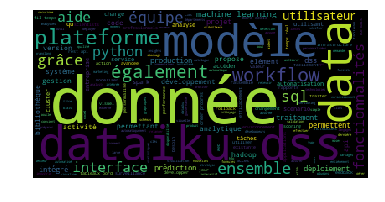

In [45]:
wordcloud = WordCloud().generate(' '.join(tokens))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Ce package dispose d'un certain nombre de paramètre permettant de rendre le nuage plus "joli"

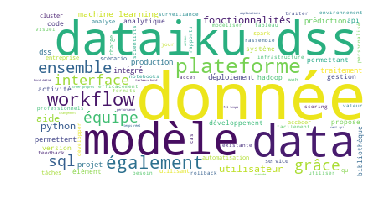

In [46]:
# Reprendre le wordcloud précédent en définissant le fond blanc grâce au paramètre background_color
wordcloud = WordCloud(background_color="white").generate(' '.join(tokens))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

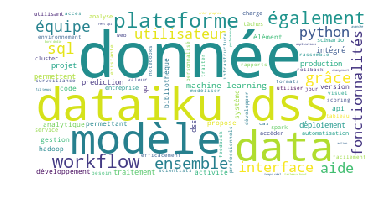

In [47]:
# Reprendre le wordcloud précédent en utilisant le paramètre max_words pour limiter à 200 le nombre de mots à afficher
wordcloud = WordCloud(background_color="white", max_words=200).generate(' '.join(tokens))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Il est également possible de personnaliser la forme et les courleurs du nuage de mots en se basant sur une image.

Pour cela, **importer une image contenant au moins 3 couleurs** et l'ouvrir en remplaçant le chemin dans le code suivant. Prenez par exemple la roue chromatique.

In [53]:
mask = np.array(Image.open("Images/roue_chromatique.jpg"))

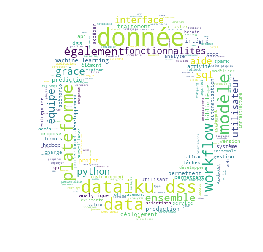

In [54]:
# Reprendre le wordcloud précédent en ajoutant le paramètre mask pour imposer la forme du nuage de mot
wordcloud = WordCloud(background_color="white", max_words=200,mask=mask).generate(' '.join(tokens))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [55]:
color= ImageColorGenerator(mask)

La modification de la couleur se fait une fois le wordcloud construit en utilsant la méthode recolor.

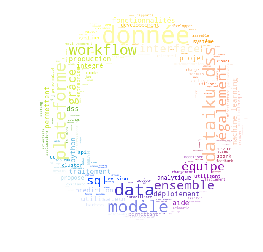

In [56]:
# Reprendre le wordcloud précédent en appliquant la méthode recolor
wordcloud = WordCloud(background_color="white", max_words=200,mask=mask).generate(' '.join(tokens))
plt.imshow(wordcloud.recolor(color_func=color))
plt.axis("off")
plt.show()

On peut ensuite sauvegarder le résultat obtenu

In [57]:
wordcloud.to_file("Images/wordcloud.png")